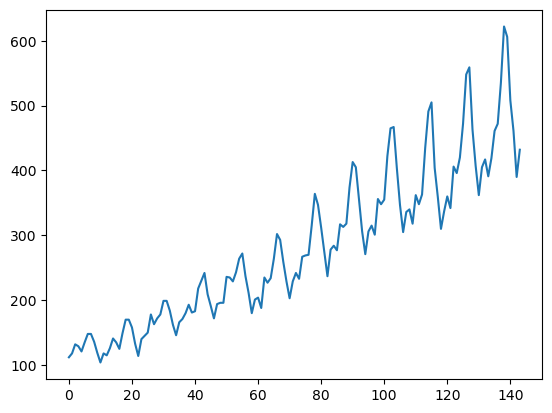

In [20]:
import pandas
import matplotlib.pyplot as plt

dataset = pandas.read_csv('air-passengers.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()

In [38]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [39]:
numpy.random.seed(7)
datafram = pandas.read_csv('air-passengers.csv', usecols=[1], engine='python')
dataset = datafram.values
dataset = dataset.astype('float32')

In [40]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [41]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [42]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [43]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [44]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [45]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 2s - loss: 0.0450 - 2s/epoch - 21ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0219 - 174ms/epoch - 2ms/step
Epoch 3/100
94/94 - 0s - loss: 0.0170 - 176ms/epoch - 2ms/step
Epoch 4/100
94/94 - 0s - loss: 0.0156 - 175ms/epoch - 2ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0146 - 218ms/epoch - 2ms/step
Epoch 6/100
94/94 - 0s - loss: 0.0137 - 192ms/epoch - 2ms/step
Epoch 7/100
94/94 - 0s - loss: 0.0127 - 182ms/epoch - 2ms/step
Epoch 8/100
94/94 - 0s - loss: 0.0117 - 177ms/epoch - 2ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0108 - 185ms/epoch - 2ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0099 - 182ms/epoch - 2ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0089 - 215ms/epoch - 2ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0080 - 211ms/epoch - 2ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0072 - 222ms/epoch - 2ms/step
Epoch 14/100
94/94 - 0s - loss: 0.0063 - 208ms/epoch - 2ms/step
Epoch 15/100
94/94 - 0s - loss: 0.0056 - 208ms/epoch - 2ms/step
Epoch 16/100
94/94 - 0s - loss: 0.0049 - 197ms/epoc

In [46]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print('Train Score: %.2f RMSE' % (testScore))

2/2 [==============================] - 0s 2ms/step
Train Score: 23.23 RMSE
Train Score: 49.02 RMSE


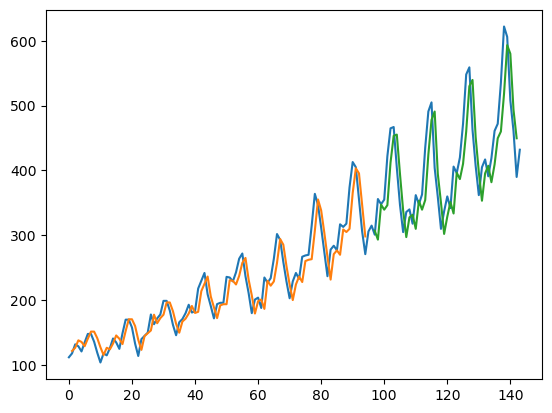

In [47]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :]  = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()